In [1]:
import torch
from tools import config, Wrapper, DatasetQuora
from modelling.models import RNNCNNMatch
from modelling.templates import SimilarityTemplate

In [2]:
%%time
dataset = DatasetQuora(train_file=config.TRAIN_FILE,
                       test_file=config.TEST_FILE, 
                       sample_submission_file=config.SAMPLE_SUBMISSION_FILE)

CPU times: user 1min 12s, sys: 660 ms, total: 1min 13s
Wall time: 1min 13s


In [3]:
rnn_cnn_match = SimilarityTemplate(
    query_model=RNNCNNMatch(), 
    vocab_size=len(dataset.token2index),
    loss_type='cross_entropy')

In [4]:
rnn_cnn_match

SimilarityTemplate(
  (query_embedding_layer): Embedding(79279, 300, padding_idx=0)
  (candidate_embedding_layer): Embedding(79279, 300, padding_idx=0)
  (query_model): RNNCNNMatch(
    (fully_connected): Linear(in_features=896, out_features=300, bias=True)
    (model): Sequential(
      (0): RNN(
        (rnn): LSTM(300, 256)
      )
      (1): CNN(
        (convolution_layer): Conv1d(256, 128, kernel_size=(1,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
      (2): CNN(
        (convolution_layer): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
      (3): CNN(
        (convolution_layer): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
        (activation_function): GELU()
        (pool_layer): MaxPool1d(kernel_size=4, stride=1, pad

In [5]:
optimizer = torch.optim.Adam(rnn_cnn_match.parameters(), lr=0.0001)

In [6]:
rcm = Wrapper(dataset=dataset, 
              model=rnn_cnn_match, 
              optimizer=optimizer, 
              model_name=config.MODEL_NAME, 
              max_norm=0.1,
              batch_size=32,
              generate_negatives_type='hard', 
              hard_negatives_multiplier=32, 
              validation_batch_size_multiplier=32)

Train Epoch 1:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 1: 1866it [03:34,  8.70it/s]                          
Train Epoch 2:   0%|          | 1/1865 [00:00<03:31,  8.82it/s]

Epoch: [1/5] | Cross_entropy loss: 0.559 | Validation Loss: 0.639
Mean Recall: 0.81 | Validation Recall: 0.75


Train Epoch 2: 1866it [03:32,  8.80it/s]                          
Train Epoch 3:   0%|          | 1/1865 [00:00<03:39,  8.51it/s]

Epoch: [2/5] | Cross_entropy loss: 0.499 | Validation Loss: 1.057
Mean Recall: 0.79 | Validation Recall: 0.42


Train Epoch 3: 1866it [03:32,  8.83it/s]                          
Train Epoch 4:   0%|          | 1/1865 [00:00<03:39,  8.48it/s]

Epoch: [3/5] | Cross_entropy loss: 0.658 | Validation Loss: 0.725
Mean Recall: 0.69 | Validation Recall: 0.64


Train Epoch 4: 1866it [03:31,  8.84it/s]                          
Train Epoch 5:   0%|          | 1/1865 [00:00<03:32,  8.75it/s]

Epoch: [4/5] | Cross_entropy loss: 0.666 | Validation Loss: 0.518
Mean Recall: 0.69 | Validation Recall: 0.75


Train Epoch 5: 1866it [03:32,  8.82it/s]                          


Epoch: [5/5] | Cross_entropy loss: 0.788 | Validation Loss: 0.963
Mean Recall: 0.61 | Validation Recall: 0.46


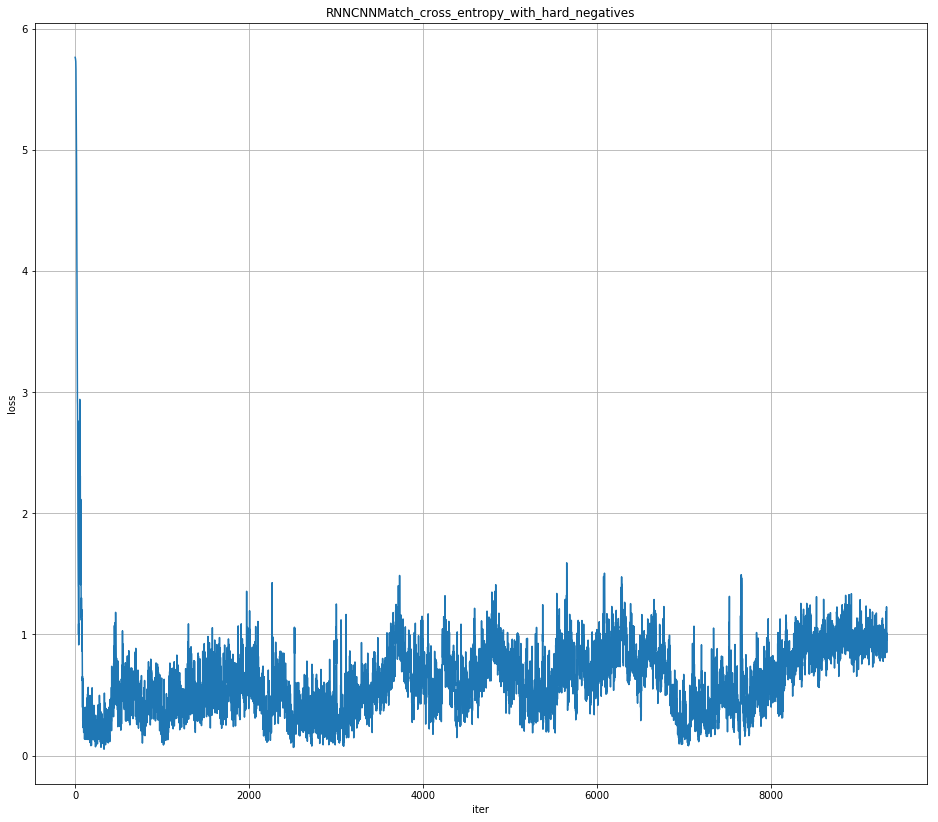

In [7]:
rcm.train(verbose=config.VERBOSE, save_best=True)

Train Epoch 6:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 6: 1866it [03:32,  8.81it/s]                          
Train Epoch 7:   0%|          | 1/1865 [00:00<03:38,  8.53it/s]

Epoch: [1/5] | Cross_entropy loss: 0.908 | Validation Loss: 0.891
Mean Recall: 0.49 | Validation Recall: 0.48


Train Epoch 7: 1866it [03:32,  8.79it/s]                          
Train Epoch 8:   0%|          | 1/1865 [00:00<03:41,  8.42it/s]

Epoch: [2/5] | Cross_entropy loss: 0.842 | Validation Loss: 0.827
Mean Recall: 0.50 | Validation Recall: 0.51


Train Epoch 8: 1866it [03:32,  8.83it/s]                          
Train Epoch 9:   0%|          | 1/1865 [00:00<03:37,  8.55it/s]

Epoch: [3/5] | Cross_entropy loss: 0.769 | Validation Loss: 0.759
Mean Recall: 0.55 | Validation Recall: 0.56


Train Epoch 9: 1866it [03:32,  8.82it/s]                          
Train Epoch 10:   0%|          | 1/1865 [00:00<03:42,  8.38it/s]

Epoch: [4/5] | Cross_entropy loss: 0.768 | Validation Loss: 0.754
Mean Recall: 0.56 | Validation Recall: 0.56


Train Epoch 10: 1866it [03:32,  8.81it/s]                          


Epoch: [5/5] | Cross_entropy loss: 0.733 | Validation Loss: 0.726
Mean Recall: 0.58 | Validation Recall: 0.58


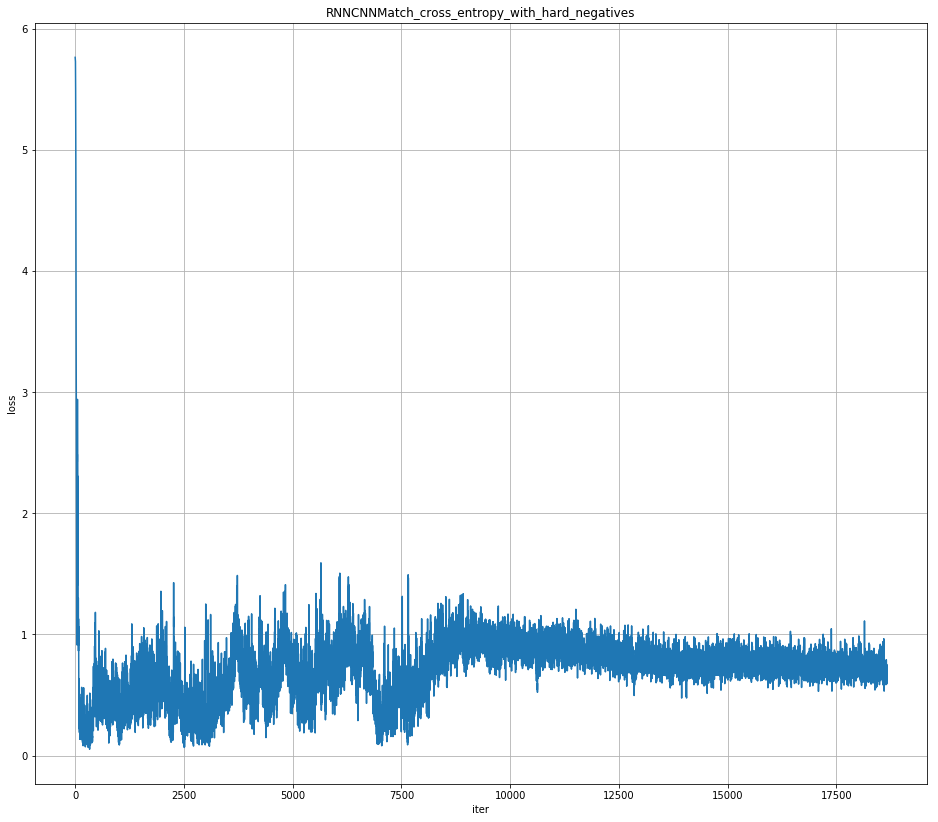

In [8]:
rcm.train(verbose=config.VERBOSE, save_best=True)

Train Epoch 11:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 11: 1866it [03:32,  8.83it/s]                          
Train Epoch 12:   0%|          | 1/1865 [00:00<03:40,  8.44it/s]

Epoch: [1/5] | Cross_entropy loss: 0.714 | Validation Loss: 0.721
Mean Recall: 0.58 | Validation Recall: 0.58


Train Epoch 12: 1866it [03:32,  8.81it/s]                          
Train Epoch 13:   0%|          | 1/1865 [00:00<03:46,  8.23it/s]

Epoch: [2/5] | Cross_entropy loss: 0.699 | Validation Loss: 0.699
Mean Recall: 0.59 | Validation Recall: 0.58


Train Epoch 13: 1866it [03:32,  8.75it/s]                          
Train Epoch 14:   0%|          | 1/1865 [00:00<03:37,  8.57it/s]

Epoch: [3/5] | Cross_entropy loss: 0.671 | Validation Loss: 0.679
Mean Recall: 0.60 | Validation Recall: 0.59


Train Epoch 14: 1866it [03:32,  8.87it/s]                          
Train Epoch 15:   0%|          | 1/1865 [00:00<03:40,  8.45it/s]

Epoch: [4/5] | Cross_entropy loss: 0.651 | Validation Loss: 0.667
Mean Recall: 0.61 | Validation Recall: 0.60


Train Epoch 15: 1866it [03:32,  8.65it/s]                          


Epoch: [5/5] | Cross_entropy loss: 0.627 | Validation Loss: 0.645
Mean Recall: 0.63 | Validation Recall: 0.62


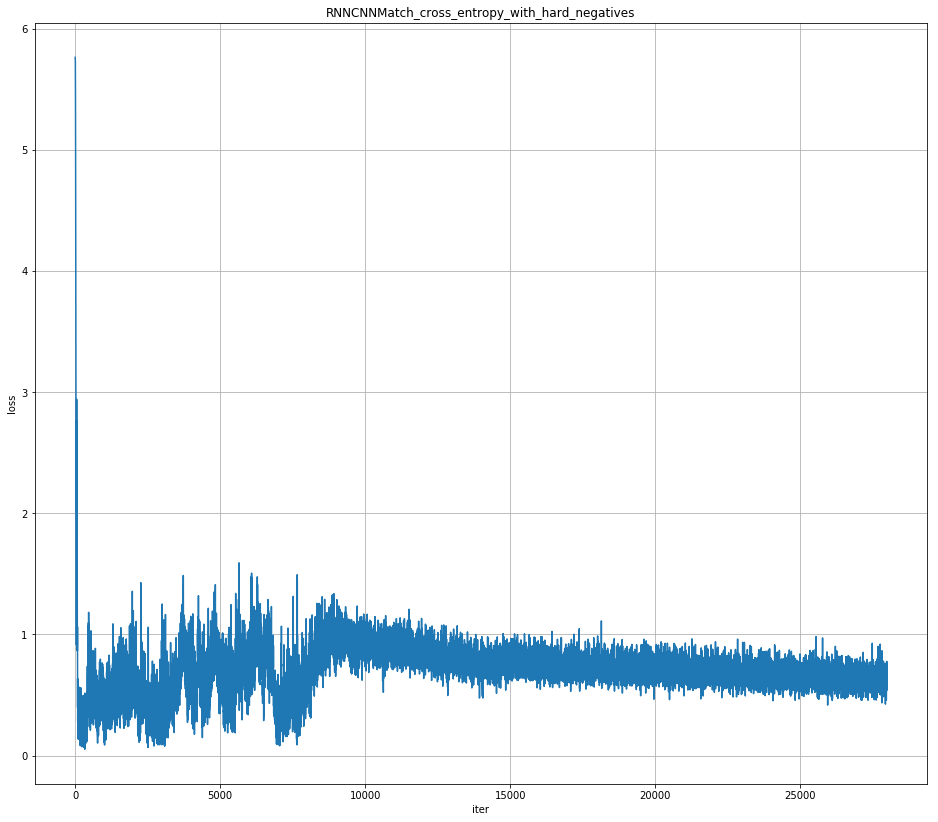

In [9]:
rcm.train(verbose=config.VERBOSE, save_best=True)

Train Epoch 16:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 16: 1866it [03:33,  8.80it/s]                          
Train Epoch 17:   0%|          | 1/1865 [00:00<03:44,  8.31it/s]

Epoch: [1/5] | Cross_entropy loss: 0.611 | Validation Loss: 0.624
Mean Recall: 0.64 | Validation Recall: 0.63


Train Epoch 17: 1866it [03:32,  8.80it/s]                          
Train Epoch 18:   0%|          | 1/1865 [00:00<03:51,  8.07it/s]

Epoch: [2/5] | Cross_entropy loss: 0.594 | Validation Loss: 0.615
Mean Recall: 0.65 | Validation Recall: 0.63


Train Epoch 18: 1866it [03:32,  8.74it/s]                          
Train Epoch 19:   0%|          | 1/1865 [00:00<03:41,  8.40it/s]

Epoch: [3/5] | Cross_entropy loss: 0.581 | Validation Loss: 0.609
Mean Recall: 0.66 | Validation Recall: 0.64


Train Epoch 19: 1866it [03:32,  8.67it/s]                          
Train Epoch 20:   0%|          | 1/1865 [00:00<03:42,  8.39it/s]

Epoch: [4/5] | Cross_entropy loss: 0.562 | Validation Loss: 0.605
Mean Recall: 0.67 | Validation Recall: 0.64


Train Epoch 20: 1866it [03:33,  8.88it/s]                          


Epoch: [5/5] | Cross_entropy loss: 0.553 | Validation Loss: 0.593
Mean Recall: 0.68 | Validation Recall: 0.65


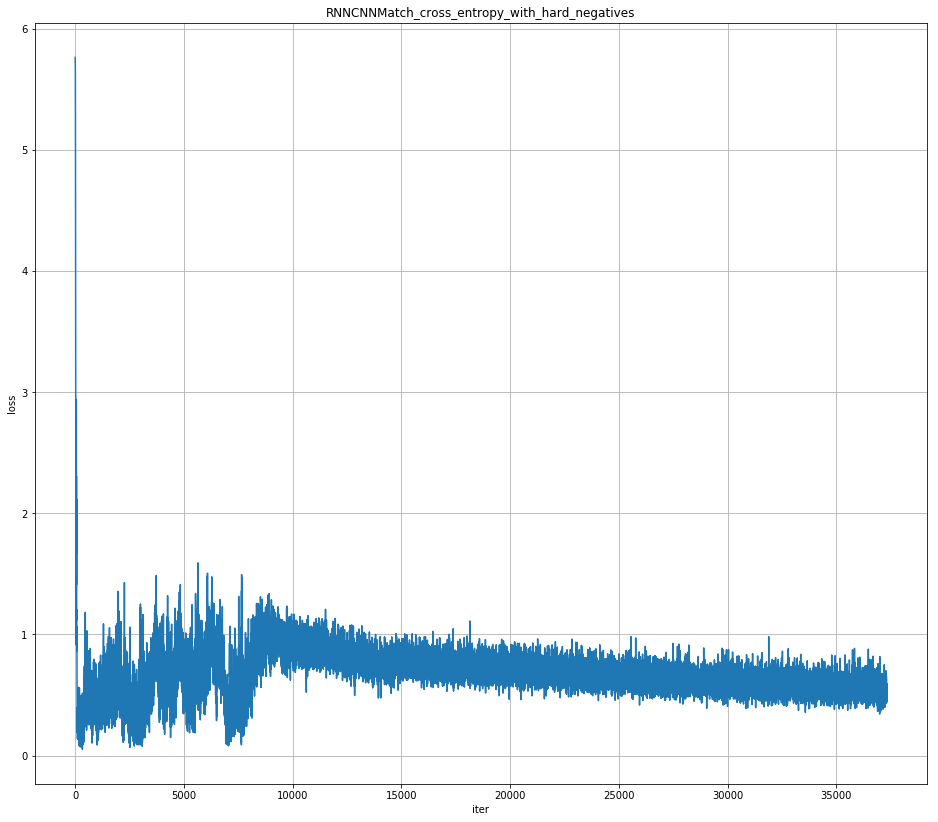

In [10]:
rcm.train(verbose=config.VERBOSE, save_best=True)

Train Epoch 21:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 21: 1866it [03:32,  8.85it/s]                          
Train Epoch 22:   0%|          | 1/1865 [00:00<03:37,  8.55it/s]

Epoch: [1/5] | Cross_entropy loss: 0.539 | Validation Loss: 0.574
Mean Recall: 0.69 | Validation Recall: 0.67


Train Epoch 22: 1866it [03:33,  8.85it/s]                          
Train Epoch 23:   0%|          | 1/1865 [00:00<03:37,  8.58it/s]

Epoch: [2/5] | Cross_entropy loss: 0.526 | Validation Loss: 0.573
Mean Recall: 0.70 | Validation Recall: 0.68


Train Epoch 23: 1866it [03:32,  8.82it/s]                          
Train Epoch 24:   0%|          | 1/1865 [00:00<03:36,  8.60it/s]

Epoch: [3/5] | Cross_entropy loss: 0.513 | Validation Loss: 0.566
Mean Recall: 0.72 | Validation Recall: 0.68


Train Epoch 24: 1866it [03:32,  8.78it/s]                          
Train Epoch 25:   0%|          | 1/1865 [00:00<03:37,  8.58it/s]

Epoch: [4/5] | Cross_entropy loss: 0.494 | Validation Loss: 0.542
Mean Recall: 0.73 | Validation Recall: 0.70


Train Epoch 25: 1866it [03:33,  8.69it/s]                          


Epoch: [5/5] | Cross_entropy loss: 0.486 | Validation Loss: 0.553
Mean Recall: 0.74 | Validation Recall: 0.70


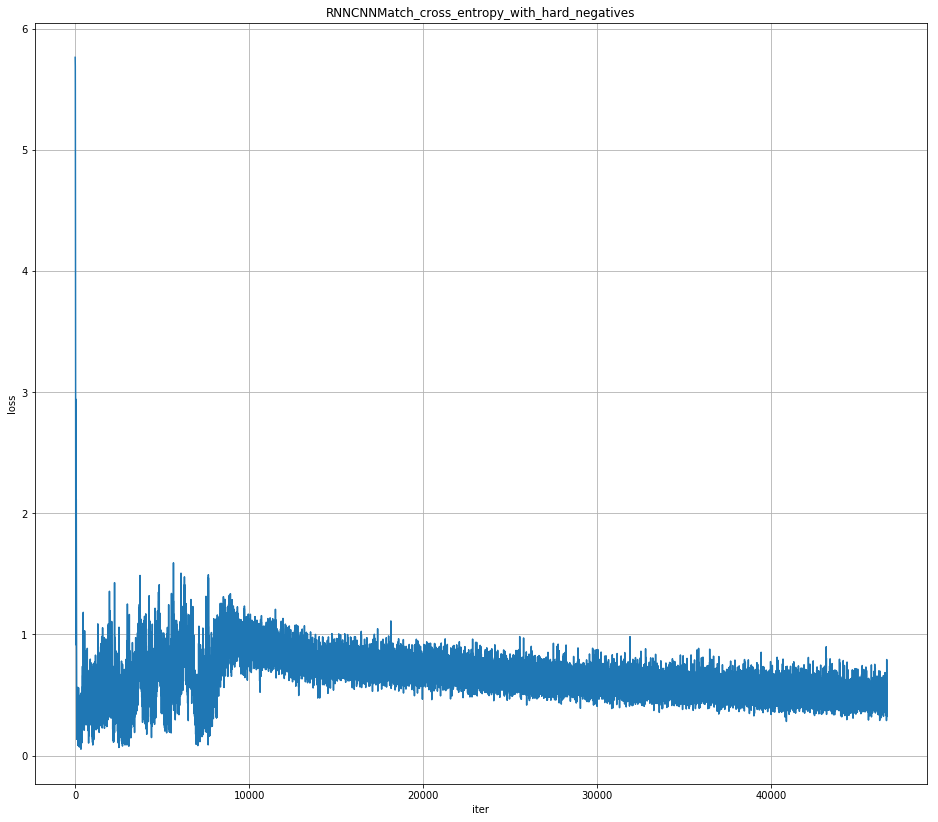

In [11]:
rcm.train(verbose=config.VERBOSE, save_best=True)

Train Epoch 26:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 26: 1866it [03:33,  8.82it/s]                          
Train Epoch 27:   0%|          | 1/1865 [00:00<03:37,  8.57it/s]

Epoch: [1/5] | Cross_entropy loss: 0.479 | Validation Loss: 0.533
Mean Recall: 0.75 | Validation Recall: 0.72


Train Epoch 27: 1866it [03:32,  8.61it/s]                          
Train Epoch 28:   0%|          | 1/1865 [00:00<03:40,  8.44it/s]

Epoch: [2/5] | Cross_entropy loss: 0.472 | Validation Loss: 0.535
Mean Recall: 0.75 | Validation Recall: 0.71


Train Epoch 28: 1866it [03:32,  8.86it/s]                          
Train Epoch 29:   0%|          | 1/1865 [00:00<03:38,  8.53it/s]

Epoch: [3/5] | Cross_entropy loss: 0.464 | Validation Loss: 0.531
Mean Recall: 0.76 | Validation Recall: 0.71


Train Epoch 29: 1866it [03:32,  8.73it/s]                          
Train Epoch 30:   0%|          | 1/1865 [00:00<03:37,  8.58it/s]

Epoch: [4/5] | Cross_entropy loss: 0.456 | Validation Loss: 0.526
Mean Recall: 0.77 | Validation Recall: 0.71


Train Epoch 30: 1866it [03:32,  8.70it/s]                          


Epoch: [5/5] | Cross_entropy loss: 0.448 | Validation Loss: 0.518
Mean Recall: 0.77 | Validation Recall: 0.72


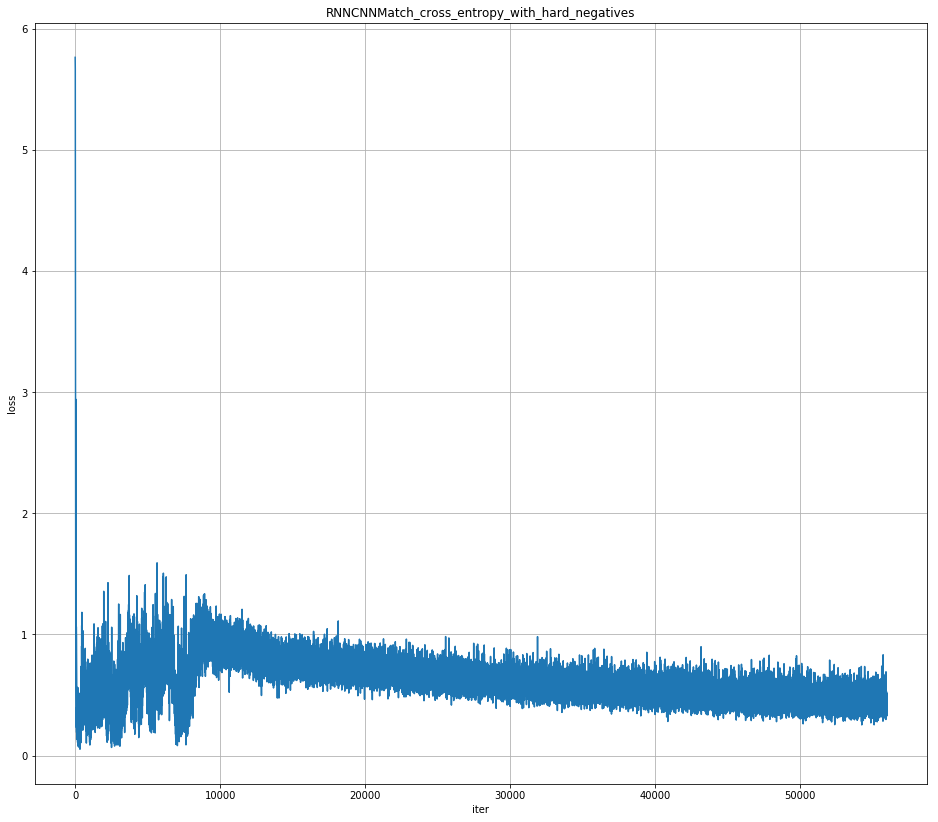

In [12]:
rcm.train(verbose=config.VERBOSE, save_best=True)

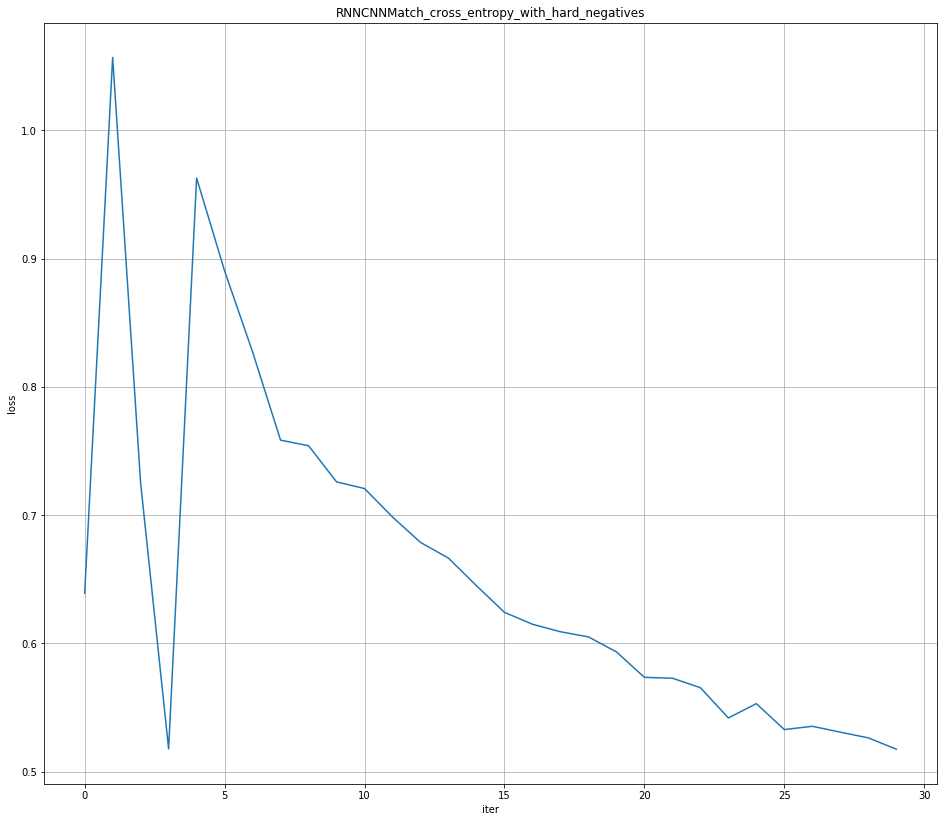

In [13]:
rcm.plot(rcm.validation_losses)

In [15]:
%%time
rcm.submission()

/usr/local/lib/python3.6/site-packages/IPython/core/magics/execution.py:1229: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  out = eval(code, glob, local_ns)


CPU times: user 5min 59s, sys: 1min 34s, total: 7min 34s
Wall time: 7min 33s
